### Challenge : Hardwork pays of
#### Given hours of a student studying, find the score

In [9]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("dark_background")

#### Loading the dataset:

In [2]:
x_train = pd.read_csv("Training Data/Linear_X_Train.csv")
x_train.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [3]:
y_train = pd.read_csv("Training Data/Linear_Y_Train.csv")
y_train.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


A single featured dataset

In [4]:
x_train.shape, y_train.shape

((3750, 1), (3750, 1))

In [8]:
# Checking for normalisation
x_train.values.mean(), x_train.values.std()

(-0.03779466168006854, 0.9920801322508517)

The data is already normalised

#### Visualisation

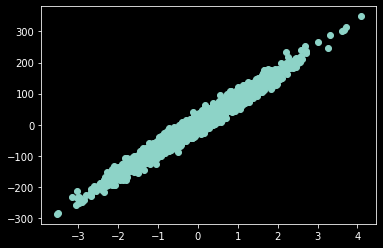

In [10]:
plt.scatter(x_train, y_train)

In [14]:
x_train.corrwith(y_train["y"])

x    0.985374
dtype: float64

Pretty correlated data